In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1) Aprendizagem não-supervisionada

Chegamos ao nosso último tópico do módulo: **aprendizagem não-supervisionada (unsurpervised learning)**.

Este tipo de aprendizagem se diferencia da aprendizagem supervisionada de modo muito simples: **os targets não fazem parte da base de dados!**

> Na aprendizagem não-supervisionada, temos acesso apenas ao conjunto de features, $\{\vec{x}_i\}_{i=1}^N$

A perda que temos com relação à aprendizagem supervisionada é gigante: sem os targets, torna-se impossível a estimação do processo teórico $\mathcal{F}$ que gerou os dados!

Assim, o máximo que podemos fazer na aprendizagem não-supervisionada é a **determinação de estrutura nos dados**:

<img src=https://www.researchgate.net/profile/Zhenyu-Wen-2/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png width=500>

Em um problema de classificação, somos capazes de encontrar a fronteira de decisão dentre as classes que **são conhecidas no treino**:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/f29c8ebf-dd5f-4fce-99bb-86ec8af21f51.PNG width=700>

Já em com dados não-supervisionados, o máximo que podemos fazer é encontrar a estrutura presente nos dados (e com maior dificuldade!)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/0c7b530d-e74b-4886-9601-740d054aa166.PNG width=300>

Para muitas aplicações, isso já é suficiente: basta saber que os dados estão estruturados (agrupados/segmentados), sendo o significado de cada grupo/segmento de menor interesse, ou facilmente estimado de outra forma; ou, então, determinar aspectos importantes das features por si só, sem qualquer preocupação com o target.

Como reflexão: Se é não supervisionado como fazemos uma avaliação do seu funcionamento?
- Intuição
- Indices de de Validação Interna (Silhueta,  Calinski-Harabasz, Davies-Buldin)

# Clusterização
  
É uma técnica de Machine Learning Não Supervisionada!  

Não temos, ou não utilizamos uma classe associada a cada observação dentro do nosso dataset.  

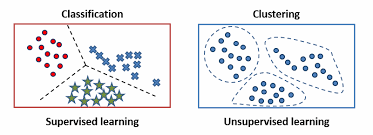

A ideia básica é: dado um conjunto de observações agrupar similares, que é dada por uma padrão.  

Em geral não temos muito claramente um problema bem definido, pois podemos encontrar padrões inesperados.  
  
Mas podemos:
- As análises de cluster são utilizadas em marketing para a segmentação de clientes com base nos benefícios obtidos com a compra da mercadoria e descobrir grupos homogêneos de consumidores.
- Ao analisar a arquitetura de dados de uma loja de varejo, organizam as informações de estoque por mercadoria, preço, tamanho, volume.
- Agrupamento de cidades próximas para melhor logística de entrega de produtos;
- Identificação de padrões climáticos;
- Identificação de genes relacionados à determinada doença;
- Identificação de documentos semelhantes em processos legais;

Buscamos então grupos homogêneos, portanto:
- Maximizamos a similaridade dentro do cluster
- Minimizamos a similaridade entre os cluster
- Observamos os clusters e atribuimos uma descrição
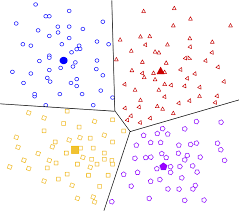

Os outros tipos de Algoritmos de Machine Learning precisam de um especialista que entenda do negócio que gerou os dados, nesse tipo de abordagem precisamos mais ainda dessa ajuda, pois a interpretação é fundamental para tirarmos proveito do trabalho final.

Para encontrar então similaridades precisamos de um critério da distância:
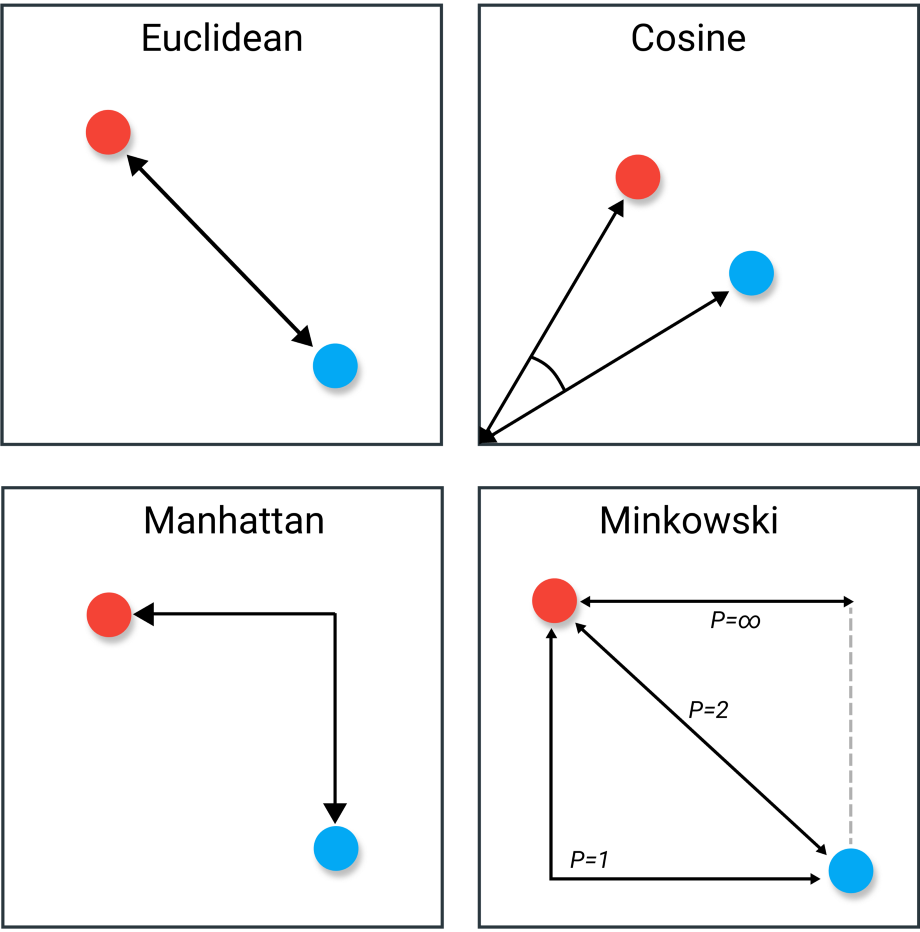

1) Já podemos afirmar que não funciona muito bem para dados categóricos:
  
Qual a distância entre o Sim e o Não? :o
  
2) Normalizaçao ou Padronização são importantes!
* Nem sempre, ops!!!

Ou o critério de correlação
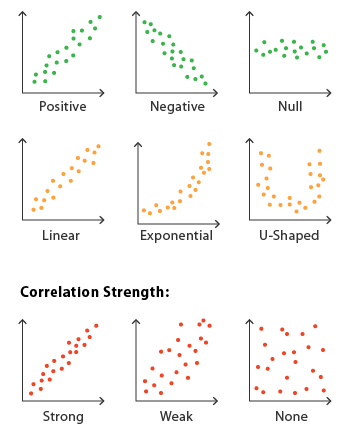

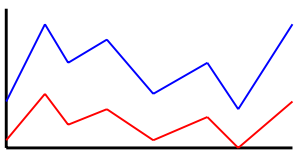

Na distância observamos a proximidade, nas medidas de correlação o padrão... Pois os dados se comportar de forma parecida (correlaćão), mas a distância pode ser grande.

E para categóricos?
Coeficiente de Jaccard
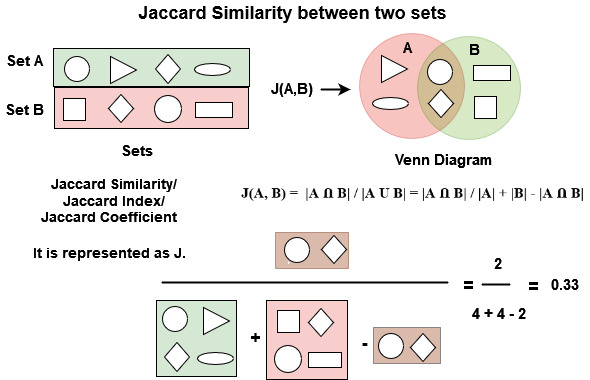

### Tipos
- O Partitioning Clustering, Cluster de particionamento, nesta técnica, os conjuntos de dados são subdivididos em um conjunto de k-grupos (onde k é o número de grupos, que é pré-definido pelo analista).
    - K-means (Centroides)

- O Hierarchy Clustering, Agrupamento de hierarquia, é usado para identificar os grupos no conjunto de dados, mas o analista não precisa pré-especificar o número de clusters a serem gerados.

    - O resultado obtido desse agrupamento é a representação dos objetos em árvore, que é reconhecida como um dendrograma. Além disso, as observações também podem ser subdivididas em grupos cortando o dendrograma no nível de semelhança desejado.
  
- Density-based spatial clustering of applications with noise - DBSCAN significa agrupamento espacial baseado em densidade de aplicativos com ruído.Pode ser utilizado para descobrir os clusters de qualquer forma em um conjunto de dados com ruído e outliers.

A principal vantagem do DBSCAN é que não há necessidade de especificar o número de clusters a serem gerados pelo usuário.

Existem outros tipos: Grid, model, fuzzy, etc

https://scikit-learn.org/stable/modules/clustering.html

### K-Means

<img src="https://miro.medium.com/max/724/0*ipBIcsy9jjvqEpbK.png" width=800>

- A escolha aleatória de centroides de partida podem criar clusters diferentes
- A princípio o K deve ser escolhido antecipadamente
- Como já falamos os dados são sensíveis a outliers

In [2]:
from sklearn.datasets import load_wine

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = load_wine(as_frame=True)
df = dados['frame']
df.drop(columns=['target'], inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.shape

(178, 13)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df_std = StandardScaler().fit_transform(df)

In [7]:
df_std = pd.DataFrame(data=df_std, columns=df.columns)
df_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
df_std.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
df_std.shape

(178, 13)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [10]:
from sklearn.cluster import KMeans

In [11]:
estimador = KMeans(n_clusters=4, random_state=42)

In [12]:
estimador.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [13]:
labels = estimador.labels_
labels

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [14]:
df_std_cluster = df_std.copy()
df_std_cluster['cluster'] = labels

In [15]:
df_std_cluster.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,3
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,3
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


Vamos supor que chegaram novas observações!!!

In [16]:
len(df_std.columns)

13

In [17]:
minimo = df_std.min().min()
minimo

-3.6791622340370105

In [18]:
maximo = df_std.max().max()
maximo

4.371372139554768

In [19]:
delta = maximo - minimo
delta

8.050534373591779

In [23]:
observacao = minimo + delta * np.random.rand(1, 13)
observacao

array([[ 3.51827499, -0.09796893, -1.54713896, -0.96122983,  1.15980149,
        -0.68714271,  2.3444827 ,  4.28043999,  3.63503704,  2.69929699,
         0.06763773,  3.29326066,  3.56274133]])

In [24]:
novo_vinho = observacao
novo_vinho

array([[ 3.51827499, -0.09796893, -1.54713896, -0.96122983,  1.15980149,
        -0.68714271,  2.3444827 ,  4.28043999,  3.63503704,  2.69929699,
         0.06763773,  3.29326066,  3.56274133]])

In [25]:
label_novo_vinho = estimador.predict(novo_vinho)
label_novo_vinho

array([3], dtype=int32)

Dados dos centroides

In [26]:
centroides = estimador.cluster_centers_
centroides

array([[-0.92047428, -0.54205238, -0.65270611,  0.16803997, -0.71111627,
        -0.46194286, -0.25847272,  0.35865056, -0.45114377, -0.92988738,
         0.51334104,  0.06374748, -0.79969176],
       [-0.69968425, -0.03089113,  0.12592974,  0.28824203,  0.30805817,
         0.63532533,  0.59274974, -0.56598859,  0.85807669, -0.69965804,
         0.33104132,  0.65417757, -0.48668217],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461],
       [ 0.98241605, -0.3617717 ,  0.23340637, -0.8320506 ,  0.44852679,
         0.90869802,  0.99205741, -0.6177819 ,  0.55519849,  0.26237089,
         0.47267321,  0.75353795,  1.2758476 ]])

Melhores features que "explicam os clusters"

In [34]:
df_centroides = pd.DataFrame(data=centroides, columns=df.columns)
df_centroides

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.920474,-0.542052,-0.652706,0.168040,-0.711116,-0.461943,-0.258473,0.358651,-0.451144,-0.929887,0.513341,0.063747,-0.799692
1,-0.699684,-0.030891,0.125930,0.288242,0.308058,0.635325,0.592750,-0.565989,0.858077,-0.699658,0.331041,0.654178,-0.486682
2,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045
3,0.982416,-0.361772,0.233406,-0.832051,0.448527,0.908698,0.992057,-0.617782,0.555198,0.262371,0.472673,0.753538,1.275848


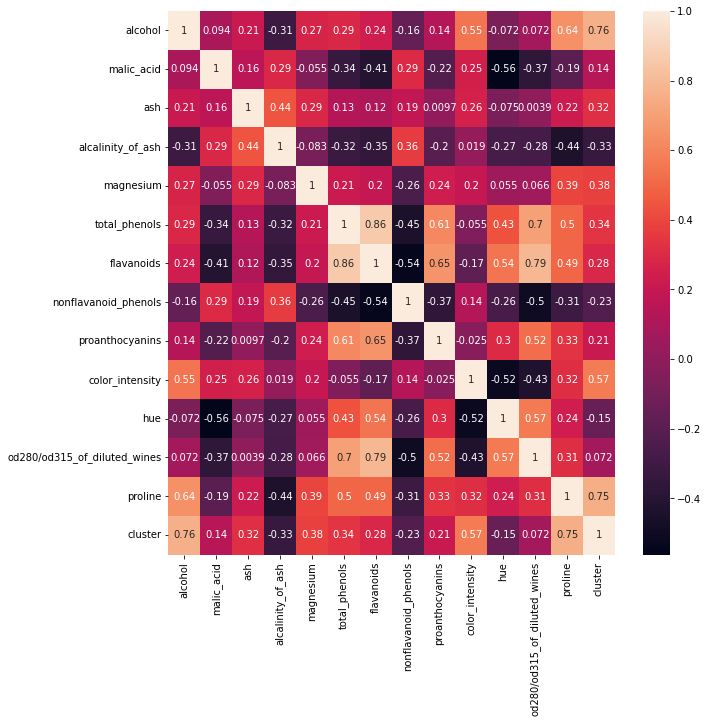

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(df_std_cluster.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='alcohol', ylabel='proline'>

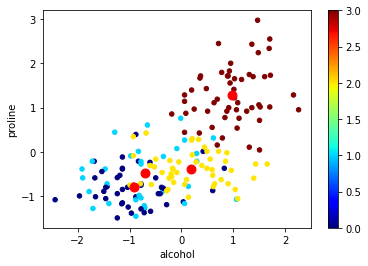

In [42]:
fig, ax = plt.subplots(1, 1)

feature_1 = 'alcohol'
feature_2 = 'proline'

# feature_1 = 'ash'
# feature_2 = 'magnesium'

df_std.plot.scatter(x=feature_1, y=feature_2, c=labels, ax=ax, colormap='jet')
df_centroides.plot.scatter(x=feature_1, y=feature_2, s=80, ax=ax, color='r')

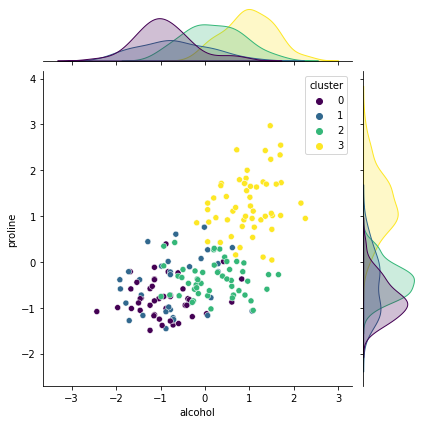

In [33]:
sns.jointplot(data=df_std_cluster, x='alcohol', y='proline', hue='cluster', palette='viridis')

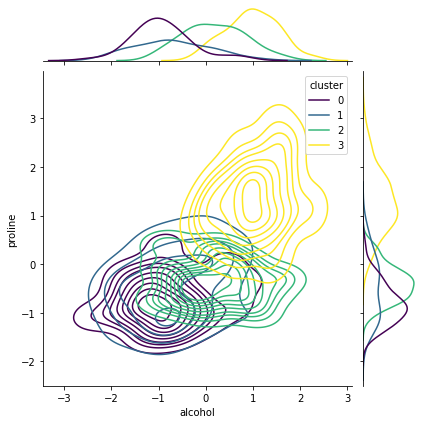

In [43]:
sns.jointplot(data=df_std_cluster, x='alcohol', y='proline', hue='cluster', palette='viridis', kind='kde')

## Avaliação do Modelo

### O Cotovelo

A inércia também é chamada de **WCSS** (Within-Cluster-Sum-of-Squares), isto é, "soma de quadrados intra-cluster", que é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Quanto menor o WCSS, mais eficiente foi a clusterização, **mas até certo ponto!**

Conforme o número de clusters ($k$) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado (o que não é nada útil, pois se cada ponto for um cluster, não há clusterização alguma!).

Assim, o que queremos não é encontrar um $k$ que minimize o WCSS, mas sim um k a partir do qual o WCSS **para de decrescer tão rapidamente!**

Quando encontramos este $k$, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de $k$, o que buscaremos será então o valor de $k$ após o qual **o gráfico deixa de ser tão inclinado**. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Se o gráfico de linhas se assemelhar a um braço, então o “cotovelo” (o ponto de inflexão na curva) é uma boa indicação de que o modelo subjacente se encaixa melhor nesse ponto. No visualizador “cotovelo” será anotado com uma linha tracejada.

Vamos utilizar um biblioteca que calcula e nos auxília nos gráficos.  
Yellowbrick  
https://www.scikit-yb.org/en/latest/

In [48]:
estimador.inertia_

1175.7051928197118

In [45]:
def calc_inercias(X, lista_k):

    lista_inercias = []

    X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])

    for k in lista_k:

        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

        inercia = kmeans.inertia_
        
        lista_inercias.append(inercia)
            
    return lista_inercias

In [46]:
def plot_cotovelo(X, lista_k):
    
    lista_inercias = calc_inercias(X, lista_k)

    plt.figure(figsize=(8, 5))

    plt.title("Método do cotovelo")

    plt.plot(lista_k, lista_inercias, marker="o")

    plt.xlabel("k (# de clusters)")
    plt.ylabel("Inercia (WCSS)")

    plt.show()

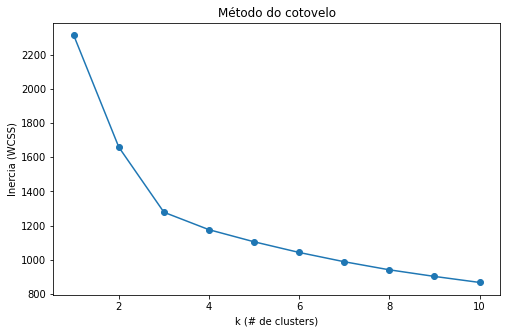

In [47]:
lista_k = range(1, 11)
plot_cotovelo(df_std.values, lista_k)

In [49]:
from yellowbrick.cluster.elbow import kelbow_visualizer

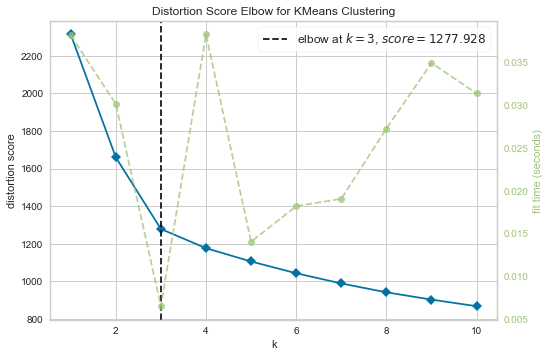

In [50]:
visualizador = kelbow_visualizer(KMeans(random_state=42), df_std.values, k=(1, 11))

## Avaliação do Modelo

### Método da silhueta

Um método alternativo ao método do cotovelo para o cálculo do número adequado de clusters é o método da silhueta.

Neste método, é calculado para cada ponto um score conhecido como **coeficiente de silhueta**, que é dado por:

$$ s = \frac{b - a}{max(a, b)} $$

onde:

- $a$ é a **distância média entre um dado ponto e os pontos de seu próprio cluster**. Portanto, essa é uma medida de **similaridade entre um ponto e seu cluster**;
- $b$ é a **distância média entre um dado ponto e os pontos do cluster mais próximo (sem ser o próprio).** Portanto, essa é uma medida de **dissimilaridade entre um ponto e os demais clusters**;

Graficamente:

<img src=https://miro.medium.com/max/712/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg width=400>

Note que $-1 < s < 1$, sendo mais próximo de $1$ quando um ponto está no cluster correto ($a \ll b$); e mais próximo de $-1$ quando um ponto está no custer errado ($b \gg a$).

Na prática, é costumeiro olhar para **a média do coeficiente $s$ para todos os pontos, denotado $\bar{s}$**, e apresentar uma única métrica. A ideia é que se, em média, tivermos pontos em clusters corretos, teremos $\bar{s} \rightarrow 1$; enquanto, se em média tivermos muitos pontos em clusters incorretos, teremos $\bar{s} \rightarrow -1$.

Este score é calculado com a função [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) do sklearn.

Uma vez que é possível calcularmos o score para um dado $k$, a decisão sobre o melhor $k$ segue similar ao método do cotovelo: basta calcular o score de silhueta para vários valores de $k$, e selecionar aquele que dá **a silueta mais próxima de $1$**!

Isto é facilmente feito:

A Silhueta  
  
Existe o código no sklearn https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://www.scikit-yb.org/en/latest/

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

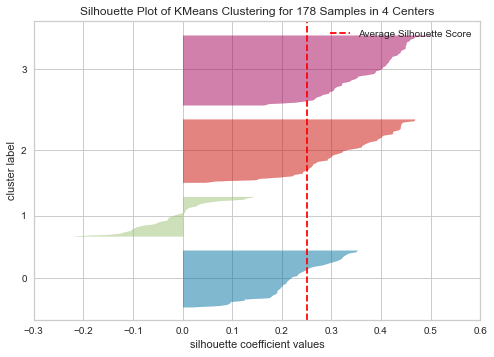

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
visualizador = SilhouetteVisualizer(estimador, colors='yellowbrick')
visualizador.fit(df_std)
visualizador.show()

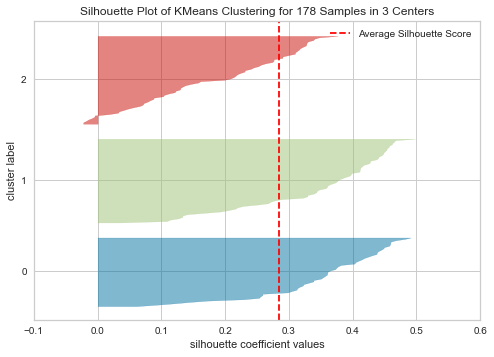

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
estimador_3 = KMeans(n_clusters=3, random_state=42)
estimador_3.fit(df_std)

visualizador = SilhouetteVisualizer(estimador_3, colors='yellowbrick')
visualizador.fit(df_std)
visualizador.show()

#### Exercicio
Utilizando a base de diabestes crie uma clusterização Kmeans.
https://www.kaggle.com/datasets/mathchi/diabetes-data-set  
Dê seu parecer de quais features são relevantes para a clusterização escolhida.

#### Exerício extra...  
Pesquise sobre K-Modes e K-Prototype.  
Faca um exemplo de cada para fixar.  

##  